week 3 미션 제출
=============

#### 필요 라이브러리 import

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import string

# matplotlib inline 사용
%matplotlib inline

#### Q1

In [2]:
idx = ["HDD", "SSD", "USB", "CLOUD"]
data = [19, 11, 5, 97]

In [3]:
# 위 데이터로 Series 구현
series = pd.Series(data, index = idx)

# 10 이상 20 이하 series 정의
series = series[series >= 10][series <= 20]

In [4]:
# 출력 함수
print(series)

HDD    19
SSD    11
dtype: int64


#### Q2

In [5]:
df1 = pd.DataFrame([
["cherry", "Fruit", 100],
["mango", "Fruit", 110],
["potato", "Vegitable", 60],
["onion", "Vegitable", 80]],
columns = ["Name", "Type", "Price"])

df2 = pd.DataFrame([
["pepper", "Vegitable", 50],
["carrot", "Vegitable", 70],
["banana", "Fruit", 90],
["kiwi", "Fruit", 120]],
columns = ["Name", "Type", "Price"])

Data Frame 결합 방법 1 : append 함수 사용

In [6]:
df3 = df1.append(df2)
df3

,Name,Type,Price
0,cherry,Fruit,100
1,mango,Fruit,110
2,potato,Vegitable,60
3,onion,Vegitable,80
0,pepper,Vegitable,50
1,carrot,Vegitable,70
2,banana,Fruit,90
3,kiwi,Fruit,120


Data Frame 결합 방법 2 : pd.concat 함수 사용
- index 신경쓰지 않기 위해서는 ignore_index = True 로 설정한다.

In [7]:
df3 = pd.concat([df1, df2], ignore_index = True) #두 dataframe을 합칠 때 index 번호는 신경쓰지 않기
df3

,Name,Type,Price
0,cherry,Fruit,100
1,mango,Fruit,110
2,potato,Vegitable,60
3,onion,Vegitable,80
4,pepper,Vegitable,50
5,carrot,Vegitable,70
6,banana,Fruit,90
7,kiwi,Fruit,120


In [8]:
# fruit과 vegitable type에 따라 정렬, 내림차순 정리
df_fruit = df3.loc[df3["Type"] == "Fruit"].sort_values(by = "Price", ascending = False)
df_veg = df3.loc[df3["Type"] == "Vegitable"].sort_values(by = "Price", ascending = False)

Data Frame 슬라이싱 방법 1 : [:2]["Price"]

In [9]:
# fruit와 vegitable 상위 2개의 가격 합 출력
print("Sum of Top 2 Fruit Price : ", sum(df_fruit[:2]["Price"]))
print("Sum of Top 2 Vegitable Price : ", sum(df_veg[:2]["Price"]))

Sum of Top 2 Fruit Price :  230
Sum of Top 2 Vegitable Price :  150


Data Frame 슬라이싱 방법 2 : ["Price"].iloc[:2]

In [10]:
print("Sum of Top 2 Fruit Price : ", sum(df_fruit["Price"].iloc[:2]))
print("Sum of Top 2 Vegetable Price : ", sum(df_veg["Price"].iloc[:2]))

Sum of Top 2 Fruit Price :  230
Sum of Top 2 Vegetable Price :  150


#### Q3

In [11]:
idx = ["Sue", "Ryan", "Jay", "Jane", "Anna"]
col = ["round_%d"%i for i in range(1, 6)] # 반복문으로 col 생성
data = [[55, 65, 60, 66, 57],
[64, 77, 71, 79, 67],
[88, 81, 79, 89, 77],
[45, 35, 30, 46, 47],
[91, 96, 90, 97, 99]]

In [12]:
# 위 데이터로 dataframe 구성
df = pd.DataFrame(data=data, index=idx, columns=col)

In [13]:
col_round_6 = [11, 15, 13, 17, 19]

Data Frame Column 추가 방법 1

In [14]:
# df에 새로운 column인 round_6의 데이터 [11, 15, 13, 17, 19] 추가
df["round_6"] = col_round_6
df

,round_1,round_2,round_3,round_4,round_5,round_6
Sue,55,65,60,66,57,11
Ryan,64,77,71,79,67,15
Jay,88,81,79,89,77,13
Jane,45,35,30,46,47,17
Anna,91,96,90,97,99,19


Data Frame Column 추가 방법 2

In [15]:
df.loc[:, "round_6"] = col_round_6
df

,round_1,round_2,round_3,round_4,round_5,round_6
Sue,55,65,60,66,57,11
Ryan,64,77,71,79,67,15
Jay,88,81,79,89,77,13
Jane,45,35,30,46,47,17
Anna,91,96,90,97,99,19


Data Frame Column 추가 방법 3

In [16]:
df = df.assign(round_6 = col_round_6)
df

,round_1,round_2,round_3,round_4,round_5,round_6
Sue,55,65,60,66,57,11
Ryan,64,77,71,79,67,15
Jay,88,81,79,89,77,13
Jane,45,35,30,46,47,17
Anna,91,96,90,97,99,19


In [17]:
# 각 데이터의 mean, max, min값 출력
df.describe().loc[["mean", "max", "min"]]

,round_1,round_2,round_3,round_4,round_5,round_6
mean,68.6,70.8,66.0,75.4,69.4,15.0
max,91.0,96.0,90.0,97.0,99.0,19.0
min,45.0,35.0,30.0,46.0,47.0,11.0


#### Q4

In [18]:
t = np.arange(0., 5., 0.2) # 0부터 5까지 0.2 간격의 nparray 생성

그래프 출력 방법 1

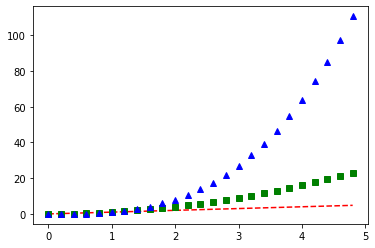

In [19]:
# 사용 마커 : red dashes, green squares, blue triangles
# 문제 주석 오류 : blue suares     -> green squares 
#                 green triangles -> blue triangles
plt.plot(t, t, "--r", t, t**2, "sg", t, t**3, "^b")

그래프 출력 방법 2

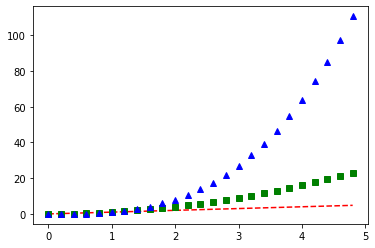

In [20]:
plt.plot(t, t, c="r", ls="dashed") # line을 dashe 형태로 바꾸기 위해 ls="dashed"
plt.plot(t, t**2, c="g", ls= "none", marker="s") # line을 없애기 위해 ls="none"
plt.plot(t, t**3, c="b", ls= "none", marker="^") # line을 없애기 위해 ls="none"

#### Q5

names 생성 방법 1

In [21]:
names = ["group_%s" %i for i in "abc"]

names 생성 방법 2

In [22]:
names = ["group_%s" %i for i in string.ascii_lowercase[:3]]

In [23]:
values = [1, 10, 100]

그래프 출력 방법 1

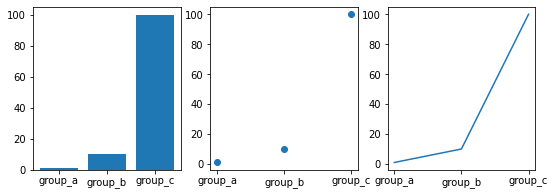

In [24]:
plt.figure(figsize=(9, 3))

plt.subplot(1,3,1)
plt.bar(names, values)

plt.subplot(1,3,2)
plt.scatter(names, values)

plt.subplot(1,3,3)
plt.plot(names, values)

그래프 출력 방법 2

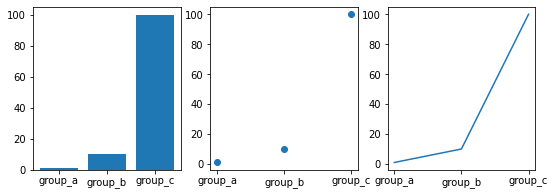

In [25]:
fig = plt.figure(figsize=(9, 3))

ax_1 = fig.add_subplot(1, 3, 1)
ax_2 = fig.add_subplot(1, 3, 2)
ax_3 = fig.add_subplot(1, 3, 3)

ax_1.bar(names, values)
ax_2.scatter(names, values)
ax_3.plot(names, values)